In [1]:
import os
os.getcwd()

import warnings
warnings.filterwarnings('ignore')

import re

In [2]:
os.chdir('/Users/dipankarmazumdar/Documents/Visual Analytics')

In [3]:
import pandas as pd
dataset = pd.read_csv("dataset1_processed.csv")

In [4]:
dataset.head()

,workclass,occupation,education,marital-status,relationship,race,sex,native-country,age,hours-per-week,workclassnew,salary
0,state gov,dmclrical,Bachelors,Never-married,Not-in-family,White,Male,United-States,0.301370,0.397959,stategov,<=50K
1,self-emp-not-inc,Exec-managerial,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,0.452055,0.122449,selfempnotinc,<=50K
2,private,Handlerscleaners,HS-grad,Divorced,Not-in-family,White,Male,United-States,0.287671,0.397959,private,<=50K
3,private,Handlers-cleaners,11th,Married-civ-spouse,Husband,Black,Male,United-States,0.493151,0.397959,private,<=50K
4,private,Profspecialty,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,0.150685,0.397959,private,<=50K


In [5]:
#Checking the unique values in my 'workclass' column:
dataset['workclassnew'].unique()

array(['stategov', 'selfempnotinc', 'private', 'federalgov', 'localgov',
       'selfempinc', 'selfempnotnc', 'selfempnc', 'selfempotinc',
       'withoutpay', 'selfempotic', 'selfempotnc'], dtype=object)

# As part of Question 5, I am fixing the typos to their actual name for the "workclass" columm:

In [6]:
new1 = []
for i in dataset['workclassnew']:
    a = i.replace("selfempnotnc", "selfempnotinc")
    new1.append(a)
dataset['workclass_iter1'] = new1

In [7]:
new2 = []
for i in dataset['workclass_iter1']:
    a = i.replace("selfempnc", "selfempinc")
    new2.append(a)
dataset['workclass_iter1'] = new2

In [8]:
new3 = []
for i in dataset['workclass_iter1']:
    a = i.replace("selfempotinc", "selfempnotinc")
    new3.append(a)
dataset['workclass_iter1'] = new3

In [9]:
new4 = []
for i in dataset['workclass_iter1']:
    a = i.replace("selfempotic", "selfempnotinc")
    new4.append(a)
dataset['workclass_iter1'] = new4

In [10]:
new5 = []
for i in dataset['workclass_iter1']:
    a = i.replace("selfempotnc", "selfempnotinc")
    new5.append(a)
dataset['workclass_iter1'] = new5

In [11]:
dataset['workclass_iter1'].unique()

array(['stategov', 'selfempnotinc', 'private', 'federalgov', 'localgov',
       'selfempinc', 'withoutpay'], dtype=object)

In [12]:
#DROP COLUMN:
dataset = dataset.drop('workclass', 1)

In [13]:
#DROP COLUMN:
dataset = dataset.drop('workclassnew', 1)

In [14]:
dataset = dataset.rename(columns={'workclass_iter1':'workclass'})

In [15]:
dataset.head(5)

,occupation,education,marital-status,relationship,race,sex,native-country,age,hours-per-week,salary,workclass
0,dmclrical,Bachelors,Never-married,Not-in-family,White,Male,United-States,0.301370,0.397959,<=50K,stategov
1,Exec-managerial,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,0.452055,0.122449,<=50K,selfempnotinc
2,Handlerscleaners,HS-grad,Divorced,Not-in-family,White,Male,United-States,0.287671,0.397959,<=50K,private
3,Handlers-cleaners,11th,Married-civ-spouse,Husband,Black,Male,United-States,0.493151,0.397959,<=50K,private
4,Profspecialty,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,0.150685,0.397959,<=50K,private


In [19]:
dataset['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Transport-moving',
       'Farming-fishing', 'Machine-op-inspct', 'Tech-support',
       'Craft-repair', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

# As part of Question 5, I am fixing the typos to their actual name for the "occupation" columm:

In [17]:
dataset.occupation=dataset.occupation.str.replace(r"(^(Te|te|Tc|tc|e|E))(.*(r|t)$)","Tech-support",regex=True)

In [18]:
dataset.occupation=dataset.occupation.str.replace(r"(^(s|S|al))(.*(s|e|l)$)","Sales",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(r|R|T|t))(.*(g|n)$)","Transport-moving",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(o|O|T|t))(.*(e|c)$)","Other-service",regex=True) 
dataset.occupation=dataset.occupation.str.replace(r"(^(c|C|ra|Ra))(.*(i|r)$)","Craft-repair",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(x|X|e|E))(.*(l|a)$)","Exec-managerial",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(pr|Pr|ro|Ro|Po|po))(.*(y|t)$)","Prof-specialty",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(h|H|an|An))(.*(r|s)$)","Handlers-cleaners",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(m|M|a|A))(.*(t|c)$)","Machine-op-inspct",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(a|A|d|D))(.*(a|l)$)","Adm-clerical",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(a|A|f|F))(.*(g|n)$)","Farming-fishing",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(Pri|pri|Prv|prv))(.*(v)$)","Priv-house-serv",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(Pro|pro|ro|Ro|Prt|prt|Prv|prv|Po|po))(.*(r|v)$)","Protective-serv",regex=True)
dataset.occupation=dataset.occupation.str.replace(r"(^(Ar|ar))(.*(s)$)","Armed-Forces",regex=True) 

#References: https://rosettacode.org/wiki/Regular_expressions

In [24]:
dataset.head()

,occupation,education,marital-status,relationship,race,sex,native-country,age,hours-per-week,salary,workclass
0,Adm-clerical,Bachelors,Never-married,Not-in-family,White,Male,United-States,0.301370,0.397959,<=50K,stategov
1,Exec-managerial,Bachelors,Married-civ-spouse,Husband,White,Male,United-States,0.452055,0.122449,<=50K,selfempnotinc
2,Handlers-cleaners,HS-grad,Divorced,Not-in-family,White,Male,United-States,0.287671,0.397959,<=50K,private
3,Handlers-cleaners,11th,Married-civ-spouse,Husband,Black,Male,United-States,0.493151,0.397959,<=50K,private
4,Prof-specialty,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba,0.150685,0.397959,<=50K,private


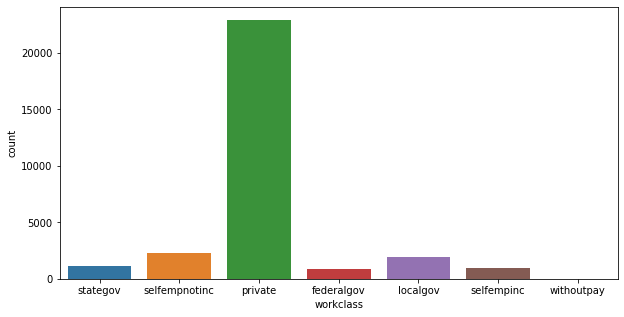

In [193]:
# Bar chart for PROCESSED WORKCLASS:
from seaborn import countplot
from matplotlib.pyplot import figure, show
width=10
height=5

figure(figsize=(width,height))
countplot(data=dataset,x="workclass")
show()

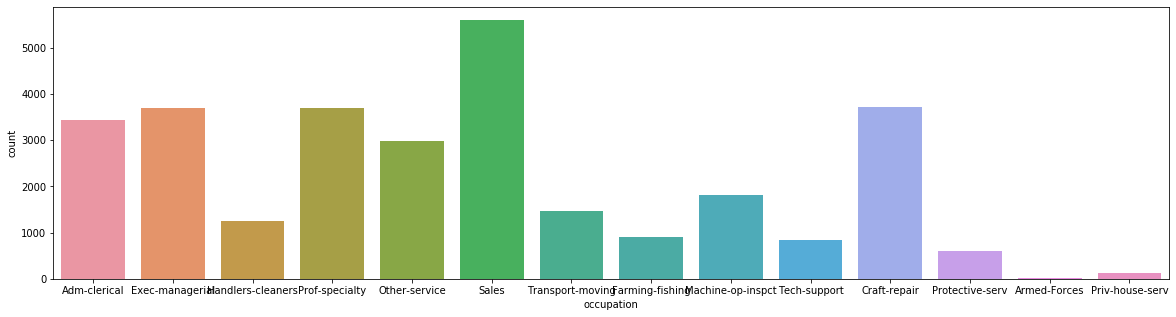

In [195]:
# Bar chart to understand Occupation Class's data:
width=20
height=5

figure(figsize=(width,height))
countplot(data=dataset,x="occupation")
show()

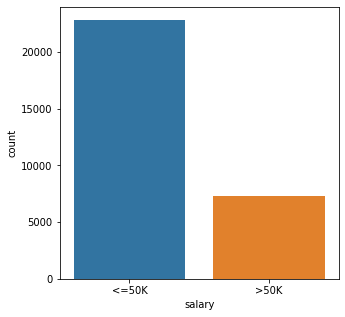

In [202]:
# Bar chart to understand Salary Class's data:
width=5
height=5

figure(figsize=(width,height))
countplot(data=dataset,x="salary")
show()

In [25]:
# Creating a new dataframe 'intds' to keep the original intact:
intds = pd.DataFrame(dataset, columns=["occupation","education", "marital-status","race","sex", "age", "hours-per-week","workclass","salary"])

In [29]:
intds.head()

,occupation,education,marital-status,race,sex,age,hours-per-week,workclass,salary
0,Adm-clerical,Bachelors,Never-married,White,Male,0.301370,0.397959,stategov,<=50K
1,Exec-managerial,Bachelors,Married-civ-spouse,White,Male,0.452055,0.122449,selfempnotinc,<=50K
2,Handlers-cleaners,HS-grad,Divorced,White,Male,0.287671,0.397959,private,<=50K
3,Handlers-cleaners,11th,Married-civ-spouse,Black,Male,0.493151,0.397959,private,<=50K
4,Prof-specialty,Bachelors,Married-civ-spouse,Black,Female,0.150685,0.397959,private,<=50K


In [30]:
# These are my FEATURES:
X = intds.iloc[:, :-1].values

In [31]:
print(X[0:2])

[['Adm-clerical' 'Bachelors' 'Never-married' 'White' 'Male' 0.301369863
  0.39795918399999997 'stategov']
 ['Exec-managerial' 'Bachelors' 'Married-civ-spouse' 'White' 'Male'
  0.452054795 0.12244898 'selfempnotinc']]


In [32]:
# These is my LABEL:
y = intds.iloc[:, 8].values

In [33]:
print(y[0:10])

['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K'
 '>50K']


# Q1: ONE HOT VECTOR ENCODING FOR INDEPENDENT VARIABLES:

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [35]:
ct_new = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4, 7]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
X_main = ct_new.fit_transform(X)

In [36]:
print(X_main[0:2])

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.301369863
  0.39795918399999997]
 [0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.452054795
  0.12244898]]


In [37]:
X_main.shape

(30162, 53)

In [38]:
# LABEL ENCODING FOR SALARY:
labelencoder_y = LabelEncoder()
y_main = labelencoder_y.fit_transform(y)

In [39]:
print(y_main[0:10])

[0 0 0 0 0 0 0 1 1 1]


# Q2:  Split dataset into Train and Test:

In [40]:
# Used scikit learn's Model Selection library:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_main, y_main, test_size=0.20)

In [41]:
X_train.shape

(24129, 53)

In [42]:
y_train.shape

(24129,)

In [43]:
X_test.shape

(6033, 53)

In [44]:
y_test.shape

(6033,)

# Q3: APPLYING LOGISTIC REGRESSION ON THE DATASET:

In [61]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 1, C=0.01)
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
# Validation set
y_pred_LR=classifier_LR.predict(X_test)

In [63]:
# Training set
y_pred_LR_train = classifier_LR.predict(X_train)

In [54]:
print(y_pred_LR)

[0 0 0 ... 0 0 0]


In [55]:
print(y_pred_LR_train)

[0 0 0 ... 0 0 1]


# ACCURACY & F1 SCORE(Logistic Regression on Validation set):

In [64]:
# Model Accuracy, how accurate is the classifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR)*100)
print("Precision:" ,precision_score(y_test, y_pred_LR, average='macro')*100)
print("Recall:" , recall_score(y_test, y_pred_LR, average='macro')*100)
print("f1_score:" , f1_score(y_test, y_pred_LR, average='macro')*100)

Accuracy: 83.49080059671805
Precision: 78.43279820872338
Recall: 71.25378986031326
f1_score: 73.68294456172315


# ACCURACY & F1 SCORE(Logistic Regression on Training set):

In [65]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_LR_train)*100)
print("Precision:" ,precision_score(y_train, y_pred_LR_train, average='macro')*100)
print("Recall:" , recall_score(y_train, y_pred_LR_train, average='macro')*100)
print("f1_score:" , f1_score(y_train, y_pred_LR_train, average='macro')*100)

Accuracy: 81.99676737535745
Precision: 77.12537580174796
Recall: 70.10233751408914
f1_score: 72.35254576917076


# APPLYING 'DECISION TREE' ON THE DATASET:

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion='entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [67]:
#Validation set pred:
y_pred_DT=classifier_DT.predict(X_test)

In [68]:
#Training set pred:
y_pred_DT_train = classifier_DT.predict(X_train)

# ACCURACY & F1 SCORE(Decision Tree on Validation set):

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT)*100)
print("Precision:" ,precision_score(y_test, y_pred_DT, average='macro')*100)
print("Recall:" , recall_score(y_test, y_pred_DT, average='macro')*100)
print("f1_score:" , f1_score(y_test, y_pred_DT, average='macro')*100)

Accuracy: 77.67279960218796
Precision: 68.44754222839869
Recall: 67.8932977914587
f1_score: 68.15689558325857


# ACCURACY & F1 SCORE(Decision Tree on Training set):

In [70]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_DT_train)*100)
print("Precision:" ,precision_score(y_train, y_pred_DT_train, average='macro')*100)
print("Recall:" , recall_score(y_train, y_pred_DT_train, average='macro')*100)
print("f1_score:" , f1_score(y_train, y_pred_DT_train, average='macro')*100)

Accuracy: 96.19544945915703
Precision: 96.23744651094535
Recall: 93.37893953438932
f1_score: 94.7013081697009


# APPLYING RANDOM FOREST ON THE DATASET:

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [72]:
y_pred_RF= classifier_RF.predict(X_test)

In [73]:
y_pred_RF_train = classifier_RF.predict(X_train)

# ACCURACY & F1 SCORE(Random Forest on Validation set):

In [74]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_RF)*100)
print("Precision:" ,precision_score(y_test, y_pred_RF, average='macro')*100)
print("Recall:" , recall_score(y_test, y_pred_RF, average='macro')*100)
print("f1_score:" , f1_score(y_test, y_pred_RF, average='macro')*100)

Accuracy: 80.77241836565557
Precision: 72.90852387099103
Recall: 71.16041369309187
f1_score: 71.93825669044107


# ACCURACY & F1 SCORE(Random Forest on Training set):

In [75]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_RF_train)*100)
print("Precision:" ,precision_score(y_train, y_pred_RF_train, average='macro')*100)
print("Recall:" , recall_score(y_train, y_pred_RF_train, average='macro')*100)
print("f1_score:" , f1_score(y_train, y_pred_RF_train, average='macro')*100)

Accuracy: 95.04330888142898
Precision: 94.11404243035675
Recall: 92.31339462244883
f1_score: 93.16824243604185


# BAR CHART TO VISUALIZE THE F1- SCORE:

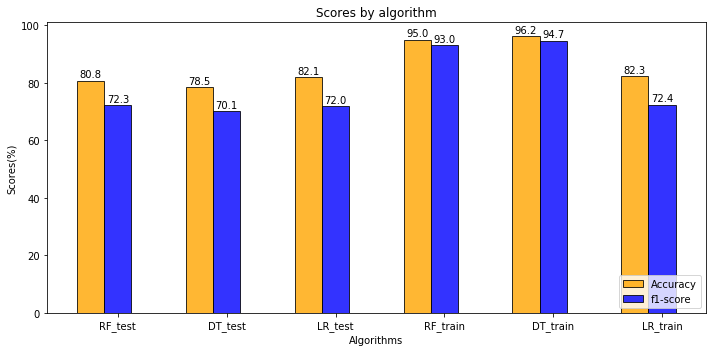

In [197]:
import matplotlib.pyplot as plt
import numpy as np


#Validation set:
accuracy_v = (80.8, 78.5, 82.1, 95.0, 96.2, 82.3)
f1_score_v = (72.3, 70.1, 72.0, 93.0, 94.7, 72.4)



fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(6)
bar_width = 0.25
opacity = 0.8

bar1 = plt.bar(index, accuracy_v, bar_width,
alpha=opacity,
color='orange',
edgecolor='black',
label='Accuracy')

bar2 = plt.bar(index + bar_width, f1_score_v, bar_width,
alpha=opacity,
color='blue',
edgecolor='black',
label='f1-score')



plt.xlabel('Algorithms')
plt.ylabel('Scores(%)')
plt.title('Scores by algorithm')
plt.xticks(index + bar_width, ('RF_test', 'DT_test', 'LR_test', 'RF_train','DT_train','LR_train'))
plt.legend(loc='lower right')

def points_values(values):
    for i in values:
        height = i.get_height()
        ax.annotate(format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                   ha = 'center')


points_values(bar1)
points_values(bar2)


plt.tight_layout()
plt.show()


# EXTERNAL REFERENCE: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

# Q4: CHANGING PARAMETER VALUE 'C' TO SEE HOW F1 VARIES for Logistic Regression:

In [204]:
from sklearn.linear_model import LogisticRegression
classifier_CV = LogisticRegression(random_state = 1, C=0.001) #have used different values of C here: 0.001,0.005,0.01,0.05,0.1,1 
classifier_CV.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
y_pred_CV=classifier_CV.predict(X_test)

# F1-SCORE FOR CHANGED VALUES:

In [206]:
# Model Accuracy, how accurate is the classifier
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_CV)*100)
print("Precision:" ,precision_score(y_test, y_pred_CV, average='macro')*100)
print("Recall:" , recall_score(y_test, y_pred_CV, average='macro')*100)
print("f1_score:" , f1_score(y_test, y_pred_CV, average='macro')*100)

Accuracy: 80.04309630366319
Precision: 75.94536133287707
Recall: 60.20842764879506
f1_score: 61.63464012767517


# Q4: LINE CHART TO SHOW PARAMETERS Vs F1-SCORE:

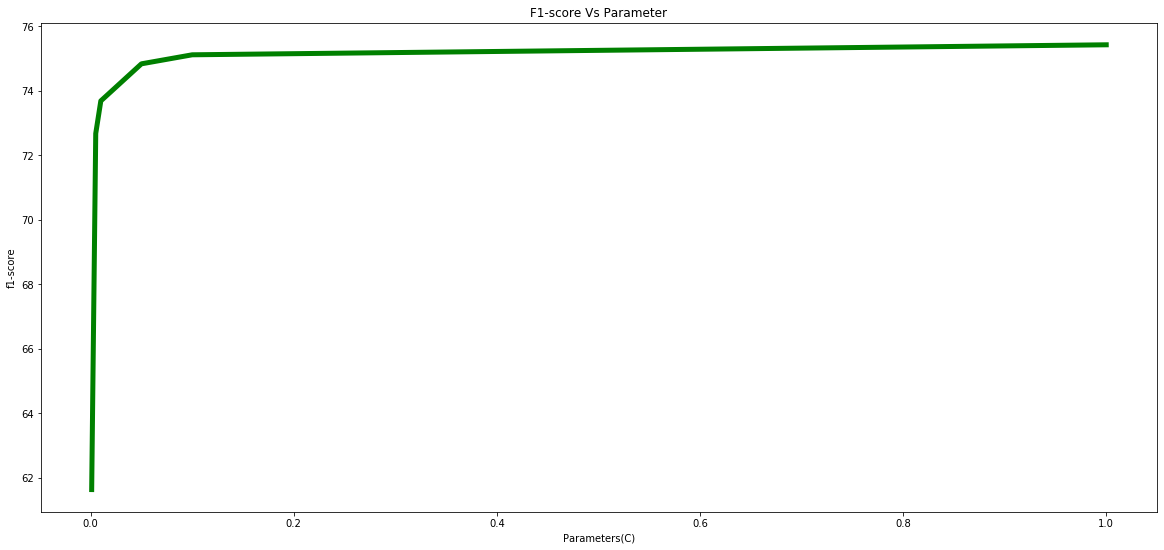

In [187]:
import matplotlib.pyplot as plt
#import numpy as np
plt.figure(figsize=(20,9))
parameter = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
f1_score = [61.63, 72.67, 73.68, 74.83, 75.11, 75.42]
plt.plot(parameter, f1_score, color='green', linewidth=5)
plt.xlabel('Parameters(C)')
plt.ylabel('f1-score')
plt.title('F1-score Vs Parameter')
plt.show()

# Q5: HYPER PARAMETER TUNING FOR LOGISTIC REGRESSION USING GRID SEARCH:

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=1)
parameters = {'C':[1000,500,100,50,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],'penalty' :['l2']}


gs = GridSearchCV(lr, parameters, cv=5, verbose = 1)
gs.fit(X_train, y_train)


print("Best Hyper parameter: ", gs.best_params_)
print("Best Accuracy : %.2f%%"%(gs.best_score_*100))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Hyper parameter:  {'C': 1, 'penalty': 'l2'}
Best Accuracy : 82.52%


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   11.0s finished


# USING THE BEST PARAMS for getting the best F1-SCORE:

In [77]:
from sklearn.linear_model import LogisticRegression
classifier_BP = LogisticRegression(C = 1, penalty = 'l2')
classifier_BP.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred_LR_after_HT= classifier_BP.predict(X_test)

In [79]:
# Model Accuracy, how accurate is the classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_LR_after_HT)*100)
print("Precision:" ,precision_score(y_test, y_pred_LR_after_HT, average='macro')*100)
print("Recall:" , recall_score(y_test, y_pred_LR_after_HT, average='macro')*100)
print("f1_score :" , f1_score(y_test, y_pred_LR_after_HT, average='macro')*100)

Accuracy: 83.77258412066965
Precision: 77.93915014102527
Recall: 73.73767311069017
f1_score : 75.42605351158463


# READ THE NEW CSV FILE TO PREDICT 'SALARY':

In [80]:
new_ds = pd.read_csv("dataset1_test.csv")

In [81]:
new_ds.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
1,17,Private,40299,11th,7,Never-married,Sales,Own-child,White,Female,0,0,25,United-States
2,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,0,0,20,United-States
3,17,Private,61838,11th,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
4,17,Private,28544,11th,7,Never-married,Sales,Not-in-family,White,Female,0,0,20,United-States


In [82]:
new_ds_pr = pd.DataFrame(new_ds, columns=["occupation","education", "marital-status","race","sex", "age", "hours-per-week","workclass"])

In [83]:
new_ds_pr.head()

,occupation,education,marital-status,race,sex,age,hours-per-week,workclass
0,Machine-op-inspct,10th,Never-married,White,Male,17,40,Private
1,Sales,11th,Never-married,White,Female,17,25,Private
2,Sales,10th,Never-married,White,Female,17,20,Private
3,Farming-fishing,11th,Never-married,White,Male,17,40,Private
4,Sales,11th,Never-married,White,Female,17,20,Private


In [84]:
#NORMALIZE THE COLUMNS: Age
n = new_ds_pr['age'].values

In [85]:
print(n[3574])

28


In [86]:
# Using MinaxScaler for getting AGE DATA in range 0-1:
import numpy
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
transarr = n.reshape(-1,1)
x_scaled = min_max_scaler.fit_transform(transarr)

In [87]:
print(x_scaled[4082])

[0.16438356]


In [88]:
new_ds_pr['agen']= x_scaled

In [89]:
new_ds_pr.head(3575)

,occupation,education,marital-status,race,sex,age,hours-per-week,workclass,agen
0,Machine-op-inspct,10th,Never-married,White,Male,17,40,Private,0.000000
1,Sales,11th,Never-married,White,Female,17,25,Private,0.000000
2,Sales,10th,Never-married,White,Female,17,20,Private,0.000000
3,Farming-fishing,11th,Never-married,White,Male,17,40,Private,0.000000
4,Sales,11th,Never-married,White,Female,17,20,Private,0.000000
...,...,...,...,...,...,...,...,...,...
3570,Sales,Some-college,Never-married,White,Female,28,40,Private,0.150685
3571,Exec-managerial,Some-college,Never-married,White,Male,28,60,Private,0.150685
3572,Exec-managerial,Assoc-voc,Never-married,White,Female,28,23,Private,0.150685
3573,Craft-repair,Some-college,Separated,White,Male,28,50,Private,0.150685


In [90]:
#DROP COLUMN:
new_ds_pr = new_ds_pr.drop('age', 1)

In [91]:
#RENAME:
new_ds_pr = new_ds_pr.rename(columns={'agen':'age'})

In [92]:
#NORMALIZE THE COLUMNS: hours
m = new_ds_pr['hours-per-week'].values

In [93]:
import numpy
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
transarrs = m.reshape(-1,1)
x_scaled_new = min_max_scaler.fit_transform(transarrs)

In [94]:
new_ds_pr['hrs']= x_scaled_new

In [95]:
#DROP COLUMN:
new_ds_pr = new_ds_pr.drop('hours-per-week', 1)

In [96]:
# RENAME:
new_ds_pr = new_ds_pr.rename(columns={'hrs':'hours-per-week'})

In [97]:
new_ds_pr.head()

,occupation,education,marital-status,race,sex,workclass,age,hours-per-week
0,Machine-op-inspct,10th,Never-married,White,Male,Private,0.0,0.397959
1,Sales,11th,Never-married,White,Female,Private,0.0,0.244898
2,Sales,10th,Never-married,White,Female,Private,0.0,0.193878
3,Farming-fishing,11th,Never-married,White,Male,Private,0.0,0.397959
4,Sales,11th,Never-married,White,Female,Private,0.0,0.193878


In [98]:
X_new = new_ds_pr.iloc[:, 0:8].values

In [99]:
print(X_new[0])

['Machine-op-inspct' '10th' 'Never-married' 'White' 'Male' 'Private' 0.0
 0.39795918367346933]


In [100]:
ct_pr = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1, 2, 3, 4, 5]),],  # the column numbers I want to apply this to
    remainder='passthrough'  # This leaves the rest of my columns in place
)
X_main_new = ct_pr.fit_transform(X_new)

In [101]:
X_main_new.shape

(15060, 53)

In [102]:
print(X_main_new[0])

[0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
 0.39795918367346933]


In [103]:
# PREDICTING NEW DATASET USING LOGISTIC REGRESSION after HYPERPARAMETER TUNING:
y_pred_newds= classifier_BP.predict(X_main_new)

In [104]:
new_ds_pr['salary'] = y_pred_newds

In [105]:
#Changing '1' and '0' classes to their respective names:

a = []
for i in(new_ds_pr['salary']):
    if i == 0:
        a.append('<=50k')
    else:
        a.append('>50k')
    

In [106]:
new_ds_pr['salary1'] = a

In [110]:
new_ds_pr.tail(10)

,occupation,education,marital-status,race,sex,workclass,age,hours-per-week,salary
15050,Prof-specialty,Prof-school,Widowed,White,Male,Self-emp-not-inc,1.0,0.602041,>50k
15051,Transport-moving,HS-grad,Married-civ-spouse,White,Male,Private,1.0,0.397959,>50k
15052,Exec-managerial,Assoc-acdm,Never-married,White,Male,Private,1.0,0.448980,<=50k
15053,Prof-specialty,Prof-school,Married-civ-spouse,White,Male,Self-emp-not-inc,1.0,0.448980,>50k
15054,Prof-specialty,Masters,Divorced,White,Male,Federal-gov,1.0,1.000000,>50k
15055,Craft-repair,HS-grad,Married-civ-spouse,Asian-Pac-Islander,Male,Private,1.0,0.397959,>50k
15056,Craft-repair,HS-grad,Never-married,White,Male,Local-gov,1.0,0.397959,<=50k
15057,Adm-clerical,Some-college,Never-married,White,Female,Private,1.0,0.112245,<=50k
15058,Other-service,Some-college,Never-married,White,Male,Private,1.0,0.091837,<=50k
15059,Adm-clerical,HS-grad,Never-married,White,Female,Private,1.0,0.397959,<=50k


In [108]:
#DROP COLUMN:
new_ds_pr = new_ds_pr.drop('salary', 1)

In [109]:
new_ds_pr = new_ds_pr.rename(columns={'salary1':'salary'})

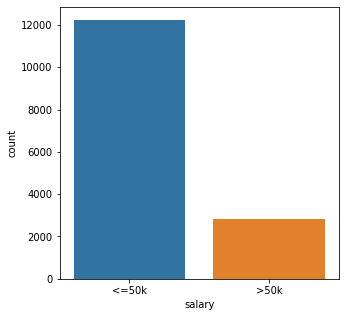

In [203]:
# Bar chart to understand Occupation Class's data:
width=5
height=5

figure(figsize=(width,height))
countplot(data=new_ds_pr,x="salary")
show()

In [111]:
# SAVE IT TO A NEW CSV after PREDICTION:
new_ds_pr.to_csv('B00825041_prediction.csv')